In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier 

In [6]:
import matplotlib.pyplot as plt
class AdaBoost:
    def __init__(self,n_clf):
        self.n_clf = n_clf
        self.clfs = []
        self.alphas = []

    def fit(self,X,y):
        n_sample,n_feature = X.shape
        w = np.full(n_sample,(1/n_sample))

        for _ in range(self.n_clf):
            clf = DecisionTreeClassifier(max_depth=1)
            clf.fit(X,y,sample_weight=w)

            pred = clf.predict(X)
            error = sum(w*(pred != y))/sum(w)
            error = max(error, 1e-10)  
            error = min(error, 1 - 1e-10)

            alpha = 0.5*np.log((1-error)/error)

            w *= np.exp(alpha*pred*y)
            w /= np.sum(w) + 1e-10

            w_cumulative = np.cumsum(w)
            indices = np.searchsorted(w_cumulative,np.random.random(n_sample))
            X = X[indices]
            y = y[indices]

            self.clfs.append(clf)
            self.alphas.append(alpha)

    def predict(self,X):
        clf_preds = np.array([alpha*clf.predict(X) for alpha,clf in zip(self.alphas,self.clfs)])
        y_pred = np.sign(np.sum(clf_preds,axis=0))
        return y_pred

    def plot_dataset(self,X,y):
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.title("Data without Decision Boundary")
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=60)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")

        plt.subplot(1, 2, 2)
        plt.title("Data with AdaBoost Decision Boundary")
        plot_decision_regions(X, y, clf=self, legend=2,markers='o',colors='blue,red')
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        
        plt.show()

        

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
def load_data(data=None):
    if data is None:
        X,y = make_classification( n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
    n_classes=2, n_clusters_per_class=2, class_sep=0.6,flip_y=0.1, random_state=42)
        y = np.where(y==0,-1,1)
    else:
        X,y=data
        y = np.where(y==0,-1,1)

    return train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
from sklearn.metrics import accuracy_score
def run_adaboost(data=None,n_clf=100):
    X_train, X_test, y_train, y_test = load_data(data)

    model = AdaBoost(n_clf=n_clf)
    model.fit(X_train,y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    print('Training Data')
    model.plot_dataset(X_train,y_train)
    print('Test Data')
    model.plot_dataset(X_test,y_test)


    print("Training Accuracy:", accuracy_score(y_train, train_preds))
    print("Testing Accuracy:", accuracy_score(y_test, test_preds))

Training Data


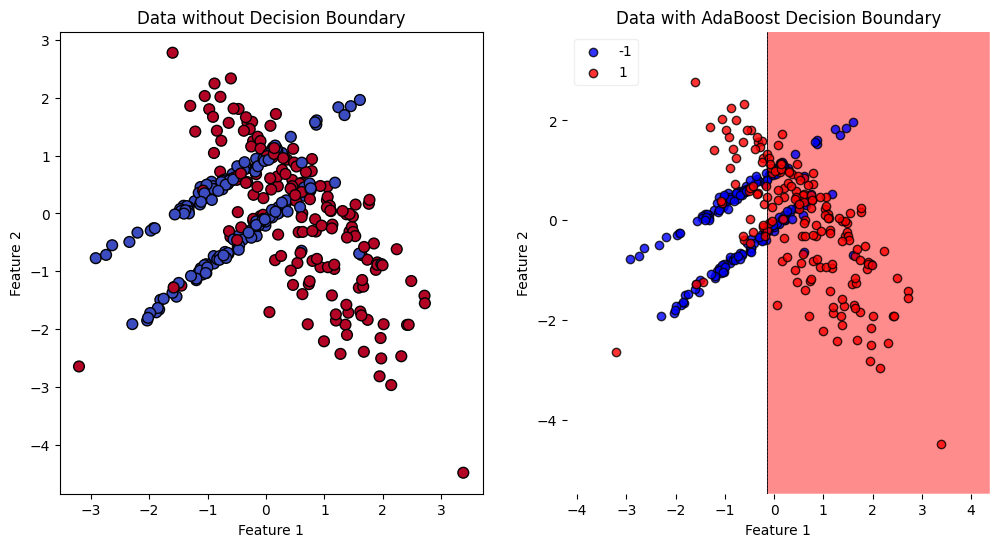

Test Data


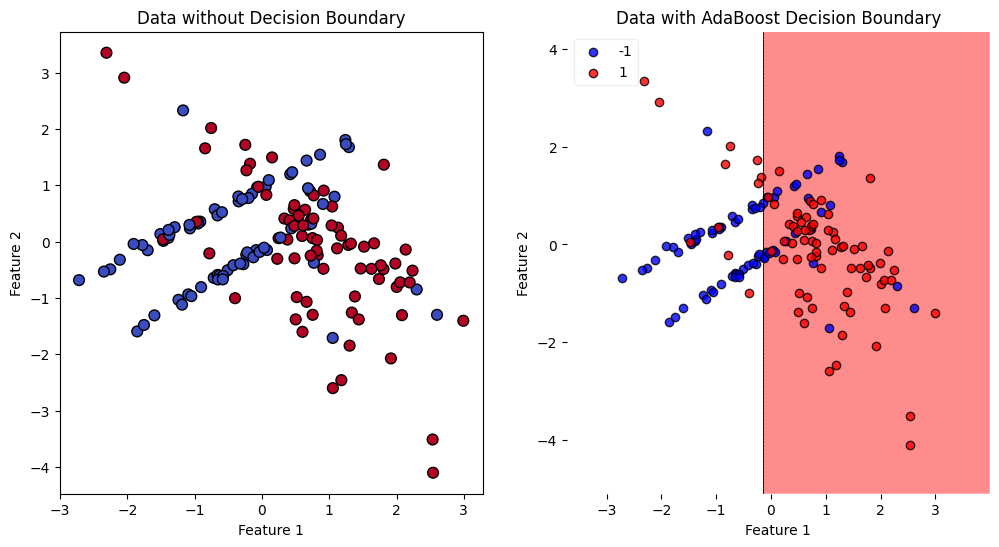

Training Accuracy: 0.7142857142857143
Testing Accuracy: 0.7533333333333333


In [11]:
run_adaboost()